In [1]:
import warnings
from sklearn.datasets import fetch_openml
warnings.filterwarnings('ignore')

# 1.	Выберите задачу для бизнеса, которую Вы хотите решить с помощью методов машинного обучения. На основание бизнес-задачи, поставьте задачу машинного обучения. Подберите дата-сет и оставьте ссылку на него.



Бизнес-задачи: Проверка клиента банка на то, вернёт он кредит или нет

Задача машинного обучения: Бинарная классификация

Ссылка на дата-сет: https://www.openml.org/search?type=data&sort=runs&id=31&status=active

# 2.	 Выполните анализ и обработку дата-сета.
•	Первичный анализ данных

•	Предобработку данных

•	Разведывательный анализ данных (Exploratory Data Analysis)

•	Создание признаков (Feature Engineering)

•	Отбор признаков (Feature selection)

•	Подготовка данных (Data Preparation)


# Первичный анализ данных

- Импорт данных

- Просмотр общей информации о датасете (размер, типы данных, пропущенные значения)
- Оценка статистических показателей (среднее, медиана, стандартное отклонение)

Загрузка датасета

In [2]:
data = fetch_openml(data_id=31)
print(data.DESCR)

**Author**: Dr. Hans Hofmann  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)) - 1994    
**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)

**German Credit dataset**  
This dataset classifies people described by a set of attributes as good or bad credit risks.

This dataset comes with a cost matrix: 
``` 
Good  Bad (predicted)  
Good   0    1   (actual)  
Bad    5    0  
```

It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1).  

### Attribute description  

1. Status of existing checking account, in Deutsche Mark.  
2. Duration in months  
3. Credit history (credits taken, paid back duly, delays, critical accounts)  
4. Purpose of the credit (car, television,...)  
5. Credit amount  
6. Status of savings account/bonds, in Deutsche Mark.  
7. Present employment, in number of years.  
8. Installment rate in percentage of disposable income  
9. Perso

Описание атрибутов

1. Статус существующего текущего счета в немецких марках.
2. Продолжительность в месяцах
3. Кредитная история (взятые кредиты, своевременно возвращенные, просрочки, важные счета)
4. Цель кредита (карточка, телевизор,...)
5. Сумма кредита
6. Состояние сберегательного счета/облигаций в немецких марках.
7. Место работы в настоящее время, количество лет.
8. Ставка рассрочки в процентах от располагаемого дохода
9. Личное положение (женат, холост,...) и пол
10. Другие должники/ поручители
11. Место жительства в настоящее время в течение X лет
12. Имущество (например, недвижимость)
13. Возраст в годах
14. Другие программы рассрочки (банки, магазины)
15. Жилье (аренда, собственное,...)
16. Количество действующих кредитов в этом банке
17. Работа
18. Количество людей, обязанных обеспечивать содержание
19. Телефон (да, нет)
20. Иностранный работник (да,нет)

In [3]:
# разделили датасет на признаки и целевую
df_x = data.data
df_target = data.target

In [13]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

По информации вижно, что у нас много категориальных признаков, 1000 строк и 20 столбцов

In [14]:
df_x.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
dtype: int64

Нулевых значений нет

In [16]:
df_target.isnull().sum()

0

In [18]:
df_target.shape


(1000,)

В столбце target также нет пустых значений и размер совпадает с размером датасета x

In [17]:
df_target.value_counts()

class
good    700
bad     300
Name: count, dtype: int64

In [19]:
df_target = df_target.replace({"good":1, "bad":0})

В целевой переменной у нас строковый тип данных, но его легко перевести в числовой, что мы и сделали

In [10]:
df_x.describe(include = 'all')

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,NaN,4,NaN,3,3,NaN,4,NaN,2,2
top,no checking,NaN,existing paid,radio/tv,NaN,<100,1<=X<4,NaN,male single,none,NaN,car,NaN,none,own,NaN,skilled,NaN,none,yes
freq,394,NaN,530,280,NaN,603,339,NaN,548,907,NaN,332,NaN,814,713,NaN,630,NaN,596,963
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,2.845000,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,1.103718,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN


По общему статистическому описанию датасета видно, что числовые даные давольно чистые

# Предобработку данных

- Обработка пропущенных значений
- Обработка дубликатов
- Кодирование категориальных признаков
- Масштабирование признаков (например, стандартизация)

Так как пустые значения отсутствуют, то пункт с их обработкой пропускаем

In [25]:
df_x.duplicated().sum()

0

Проверили дублирующиеся строки, они также отсутствуют

Перейдём к работе над признаками в датасете

In [26]:
df_x.personal_status.value_counts()

personal_status
male single           548
female div/dep/mar    310
male mar/wid           92
male div/sep           50
Name: count, dtype: int64

Данные значения можно разделить на два признака - пол и соц. статус

Добавили два столбца вместо одного personal_status: один столбец с полом (значения 1 и 0), другой с семейным положением

In [27]:
def find_sex(x):
  if "female" in x:
    return 0
  else:
    return 1

df_x['is_male'] = df_x['personal_status'].apply(find_sex)

In [28]:
df_x.is_male.value_counts()

is_male
1    690
0    310
Name: count, dtype: int64

In [29]:
def social_status(x):
  return x.split(" ")[1]

df_x['social_status'] = df_x['personal_status'].apply(social_status)
df_x.drop(columns=['personal_status'], inplace=True)

---
---

Преобразуем столбцы с checking_status, employment, savings_status, own_telephone,	foreign_worker. Заменим на числовые значения

In [30]:
df_x.checking_status.value_counts()

checking_status
no checking    394
<0             274
0<=X<200       269
>=200           63
Name: count, dtype: int64

In [31]:
def checking_status_change(x):
  if x == "no checking":
    return 1
  if x == "<0":
    return 0
  if x == "0<=X<200":
    return 2
  if x == ">=200":
    return 3

df_x['checking_status'] = df_x.checking_status.apply(checking_status_change)

In [32]:
df_x.checking_status.value_counts()

checking_status
1    394
0    274
2    269
3     63
Name: count, dtype: int64

---


In [33]:
df_x.employment.value_counts()

employment
1<=X<4        339
>=7           253
4<=X<7        174
<1            172
unemployed     62
Name: count, dtype: int64

In [34]:
df_x.employment = df_x.employment.replace({"unemployed":0, "<1":0, "1<=X<4":1, "4<=X<7":2, ">=7":3})
df_x.employment.value_counts()

employment
1    339
3    253
0    234
2    174
Name: count, dtype: int64

---

In [35]:
df_x.savings_status.value_counts()

savings_status
<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name: count, dtype: int64

In [36]:
df_x.savings_status = df_x.savings_status.replace({"no known savings":0, "<100":1, "100<=X<500":2, "500<=X<1000":3, ">=1000":4})
df_x.savings_status.value_counts()

savings_status
1    603
0    183
2    103
3     63
4     48
Name: count, dtype: int64

---

In [37]:
df_x.own_telephone.value_counts()

own_telephone
none    596
yes     404
Name: count, dtype: int64

In [38]:
df_x.own_telephone=df_x.own_telephone.replace({"none":0, "yes":1})
df_x.own_telephone.value_counts()

own_telephone
0    596
1    404
Name: count, dtype: int64

---

In [39]:
df_x.foreign_worker.value_counts()

foreign_worker
yes    963
no      37
Name: count, dtype: int64

In [40]:
df_x.foreign_worker=df_x.foreign_worker.replace({"no":0, "yes":1})
df_x.foreign_worker.value_counts()

foreign_worker
1    963
0     37
Name: count, dtype: int64

---
---

Изменим столбцы credit_history, purpose

In [41]:
df_x.credit_history.value_counts()

credit_history
existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: count, dtype: int64

In [42]:
# соединим две последние категории вместе
df_x['credit_history'] = df_x['credit_history'].replace({"no credits/all paid":"all paid"})
df_x.credit_history.value_counts()

credit_history
existing paid                     530
critical/other existing credit    293
all paid                           89
delayed previously                 88
Name: count, dtype: int64

---


In [43]:
df_x.purpose.value_counts()

purpose
radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliance      12
other                   12
retraining               9
Name: count, dtype: int64

In [44]:
# соединим категорию обучение и переобучение; мебель и оборудование и бытовую технику
df_x['purpose'] = df_x['purpose'].replace({"retraining":"education", "domestic appliance":"furniture/equipment"})
df_x.purpose.value_counts()

purpose
radio/tv               280
new car                234
furniture/equipment    193
used car               103
business                97
education               59
repairs                 22
other                   12
Name: count, dtype: int64

---

In [45]:
df_x.job.value_counts()

job
skilled                      630
unskilled resident           200
high qualif/self emp/mgmt    148
unemp/unskilled non res       22
Name: count, dtype: int64

In [46]:
# соединим в два столбца С_навыками и С_работой
df_x['work'] = df_x['job'].replace({"high qualif/self emp/mgmt":1, "unemp/unskilled non res":0, "skilled":0, "unskilled resident":0})
df_x['skills'] = df_x['job'].replace({"high qualif/self emp/mgmt":1, "unemp/unskilled non res":0, "skilled":1, "unskilled resident":0})
print(df_x.work.value_counts())
print(df_x.skills.value_counts())
df_x.drop(columns=['job'], inplace=True)

work
0    852
1    148
Name: count, dtype: int64
skills
1    778
0    222
Name: count, dtype: int64


---
---
---
Итог: мы преобразовали все колонки, которые могли, некоторые изменили на числовые, в некоторых соединили малочисленные группы


# Разведывательный анализ данных (Exploratory Data Analysis):

- Визуализация данных (гистограммы, диаграммы рассеяния, box plot)
- Анализ корреляции между признаками
- Выявление выбросов и аномалий

In [49]:
import matplotlib.pyplot as plt


In [53]:
df_x.shape

(1000, 22)

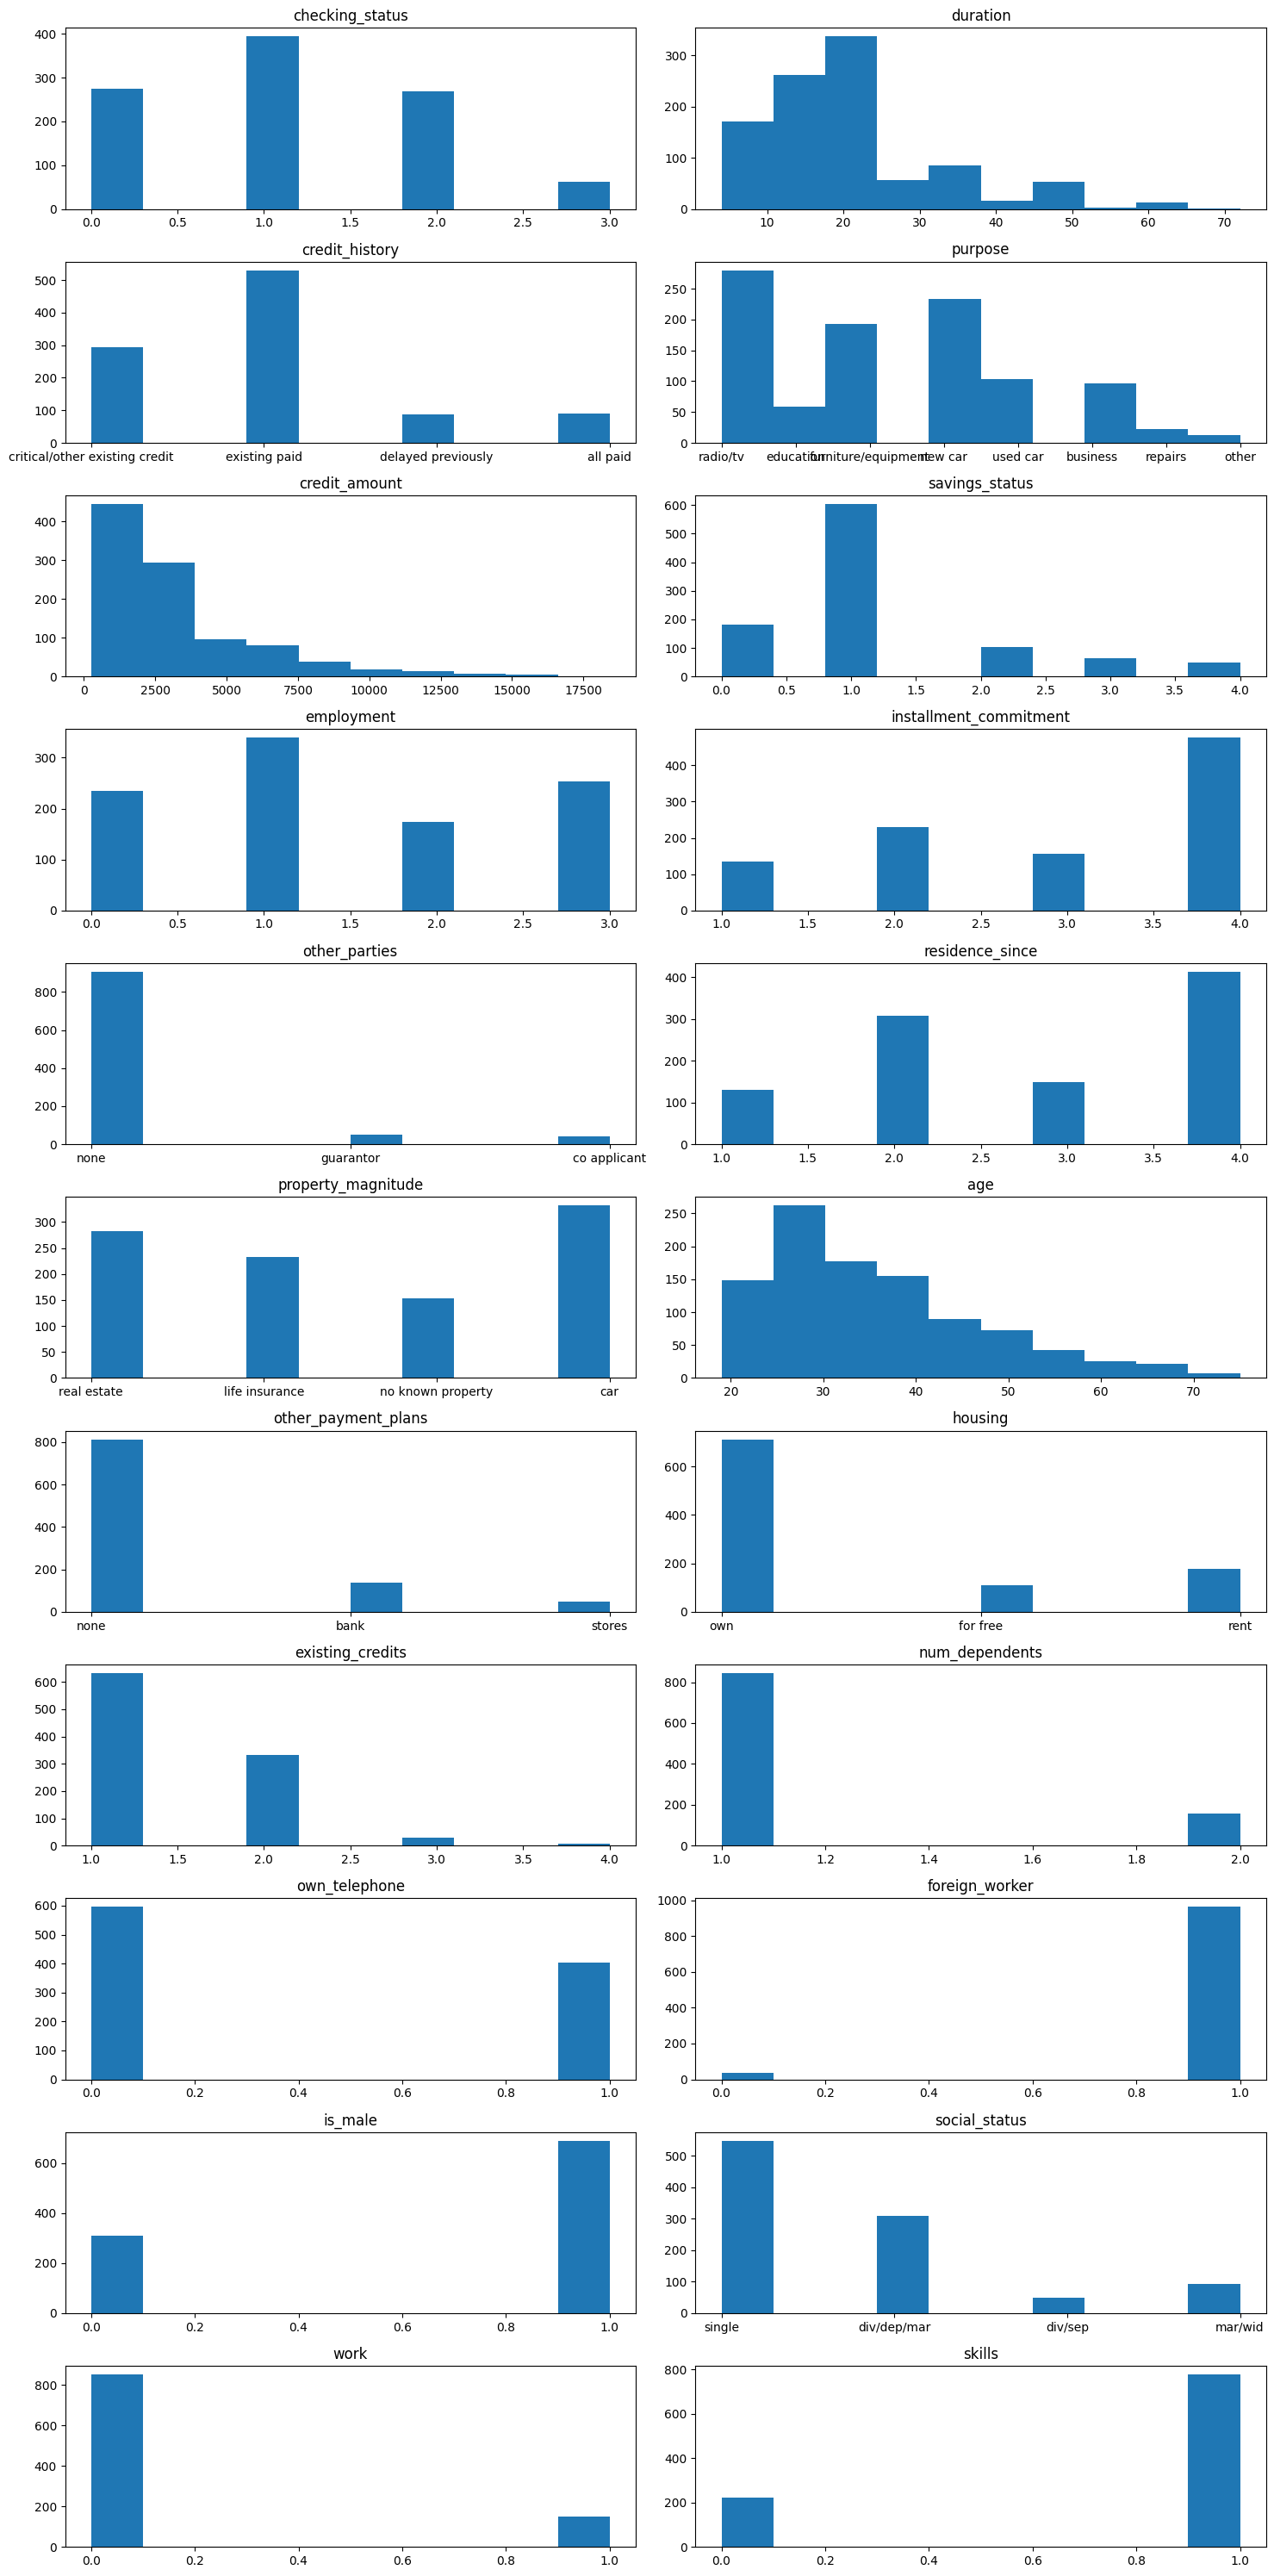

In [54]:
fig, axs = plt.subplots(nrows=11, ncols=2, figsize=(15, 30))

# Разворачиваем двумерный массив axs в одномерный для удобства обращения
axs = axs.flatten()

# Перебираем каждый столбец и строим гистограмму
for i, col in enumerate(df_x.columns):
    axs[i].hist(df_x[col], bins=10)  # Можно настроить количество бинов (столбцов) по желанию
    axs[i].set_title(col)  # Устанавливаем заголовок для каждой гистограммы

plt.tight_layout()  # Для улучшения визуального отображения
plt.show()

Выводы:

- большие кредиты берут редко
- возраст тех, кто берет кредит часто в районе 30-40, распределение логорифмическое
- люди не в браке берут кредит чаще
- мужчины чаще берут кредиты, чем женщины
- иностранцев больше


In [55]:
import seaborn as sns

In [59]:
numeric_columns = df_x.select_dtypes(include=['int', 'float'])
numeric_columns.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,is_male
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,1
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0,0
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0,1
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0,1
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0,1


<Axes: >

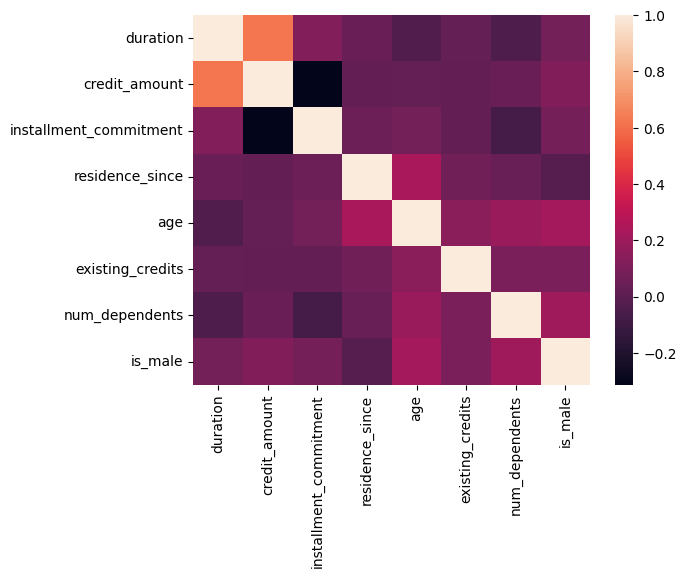

In [60]:
sns.heatmap(numeric_columns.corr(method='spearman'))

По матрице корреляции для числовых признаков мы видим сильную прямую линейную зависимость между суммой кредита и продолжительностью, а также, мы видим давольно сильную обратную зависимость между комиссией за рассрочку платежа и размером кредита

# Создание признаков (Feature Engineering):

- применение препроцессинга

In [62]:
import pandas as pd

In [70]:
df_x_num = pd.get_dummies(df_x, drop_first=True)
df_x_num.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,is_male,checking_status_0,checking_status_3,...,other_payment_plans_stores,housing_own,housing_rent,own_telephone_1,foreign_worker_1,social_status_div/sep,social_status_mar/wid,social_status_single,work_0,skills_0
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,1,True,False,...,False,True,False,True,True,False,False,True,True,False
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0,0,False,False,...,False,True,False,False,True,False,False,False,True,False
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0,1,False,False,...,False,True,False,False,True,False,False,True,True,True
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0,1,True,False,...,False,False,False,False,True,False,False,True,True,False
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0,1,True,False,...,False,False,False,False,True,False,False,True,True,False


Так как в нашем датасете всё ещё были категориальные признаки, то мы преобразовали их к числовым при помощи get_dummies

# Отбор признаков (Feature selection):

- Выбор признаков необходимых для обучения модели и удаление малозначимых

В данном случае все признаки важны для обучения модели. Поэтому на данном этапе оставим их все в датасете

# Подготовка данных (Data Preparation):
- Разделение данных на обучающую и тестовую выборки
- Масштабирование данных (например, Min-Max Scaling)
- Подготовка данных для моделирования (преобразование в формат, подходящий для модели)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_x_num, df_target, test_size=0.33, random_state=42)

In [80]:
X_train_ = X_train
X_test_ = X_test


In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_)
scaler.transform(X_train_)
scaler.transform(X_test_)
print("")

# 3.	Выберите несколько метрик для оценки моделей машинного обучения. Обоснуйте свой выбор и дайте интерпретацию метрик для бизнес-задачи.

Для оценки моделей машинного обучения в задаче кредитного скоринга, где целью является определение подходит ли человек для выдачи кредита, следует выбрать следующие метрики:


* Accuracy (Точность): Эта метрика показывает долю правильно классифицированных случаев из общего числа случаев. В контексте кредитного скоринга, высокая точность означает, что модель правильно определяет, кому можно выдать кредит, и кому нет.
* Precision (Точность): Precision измеряет долю истинно положительных результатов среди всех положительных предсказаний модели. В случае кредитного скоринга, высокая precision означает, что модель правильно идентифицирует тех, кому можно безопасно выдать кредит.
* Recall (Полнота): Recall показывает долю истинно положительных результатов среди всех реальных положительных случаев. В контексте кредитного скоринга, высокая полнота означает, что модель не упускает потенциально хороших заемщиков, которым можно выдать кредит.
* ROC AUC: Площадь под ROC-кривой (ROC AUC) является метрикой, оценивающей качество бинарной классификации. Она позволяет оценить способность модели различать между классами. В задаче кредитного скоринга, высокое значение ROC AUC указывает на хорошую способность модели разделять хороших и плохих заемщиков.


Выбор этих метрик обоснован тем, что они позволяют оценить как общее качество модели, так и ее способность правильно классифицировать положительные и отрицательные случаи, что критически важно для бизнес-задачи кредитного скоринга.

# 4.	Постройте 4 модели машинного обучения для решение поставленной задачи.

In [83]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
print("accuracy_lr = ", accuracy_lr)
print("precision_lr = ", precision_lr)
print("recall_lr = ", recall_lr)
print("roc_auc_lr = ", roc_auc_lr)

accuracy_lr =  0.7363636363636363
precision_lr =  0.7751937984496124
recall_lr =  0.8733624454148472
roc_auc_lr =  0.6495525098361365


In [85]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)

print("accuracy_dt = ", accuracy_dt)
print("precision_dt = ", precision_dt)
print("recall_dt = ", recall_dt)
print("roc_auc_dt = ", roc_auc_dt)

accuracy_dt =  0.6666666666666666
precision_dt =  0.7489539748953975
recall_dt =  0.7816593886462883
roc_auc_dt =  0.5937999913528471


In [96]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

print("accuracy_rf = ", accuracy_rf)
print("precision_rf = ", precision_rf)
print("recall_rf = ", recall_rf)
print("roc_auc_rf = ", roc_auc_rf)

accuracy_rf =  0.7696969696969697
precision_rf =  0.7822878228782287
recall_rf =  0.925764192139738
roc_auc_rf =  0.670802888149077


In [88]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)

y_pred_gb = model_gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)

print("accuracy_gb = ", accuracy_gb)
print("precision_gb = ", precision_gb)
print("recall_gb = ", recall_gb)
print("roc_auc_gb = ", roc_auc_gb)

accuracy_gb =  0.7666666666666667
precision_gb =  0.7814814814814814
recall_gb =  0.9213973799126638
roc_auc_gb =  0.6686194820355398


In [89]:
metrics = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_gb],
    'Precision': [precision_lr, precision_dt, precision_rf, precision_gb],
    'Recall': [recall_lr, recall_dt, recall_rf, recall_gb],
    'ROC AUC': [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_gb]
}

metrics_df = pd.DataFrame(metrics)

print(metrics_df)

                 Model  Accuracy  Precision    Recall   ROC AUC
0  Logistic Regression  0.736364   0.775194  0.873362  0.649553
1        Decision Tree  0.666667   0.748954  0.781659  0.593800
2        Random Forest  0.769697   0.778182  0.934498  0.665269
3    Gradient Boosting  0.766667   0.781481  0.921397  0.668619


Исходя из предоставленных метрик, лучшей моделью для задачи кредитного скоринга является модель Random Forest. Вот почему:
* Accuracy (Точность): Модель Random Forest имеет самую высокую точность (0.7697), что означает, что она делает наибольшее количество правильных прогнозов по сравнению с другими моделями.
* Precision (Точность): Random Forest также показывает хороший показатель precision (0.7782), что означает, что она способна правильно классифицировать заемщиков, которым можно безопасно выдать кредит.
* Recall (Полнота): Модель Random Forest имеет высокий показатель recall (0.9345), что говорит о том, что она хорошо идентифицирует потенциально хороших заемщиков, которым можно выдать кредит.
* ROC AUC: Хотя ROC AUC для всех моделей находится на среднем уровне, у Random Forest он все равно выше (0.6653), что указывает на хорошую способность модели различать между классами.

Исходя из этих метрик, модель Random Forest демонстрирует более высокую общую производительность по сравнению с другими моделями, что делает ее лучшим выбором для задачи кредитного скоринга.

# 5.	Проведите диагностику лучшей модели из пункта 4.

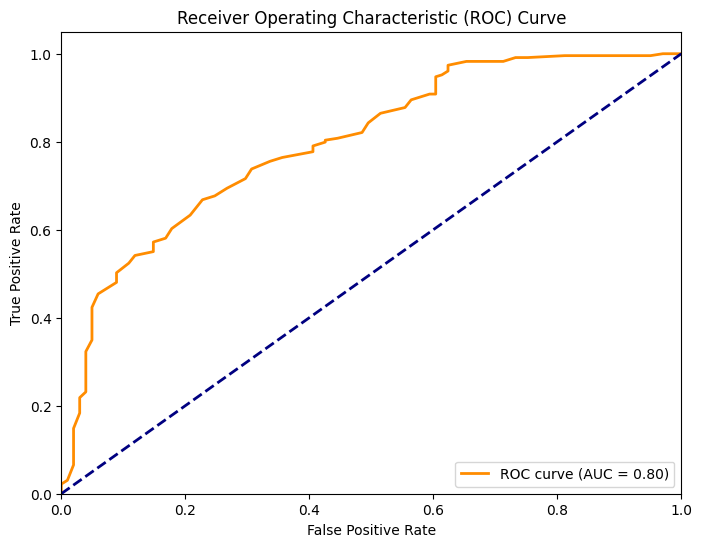

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob = model_rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

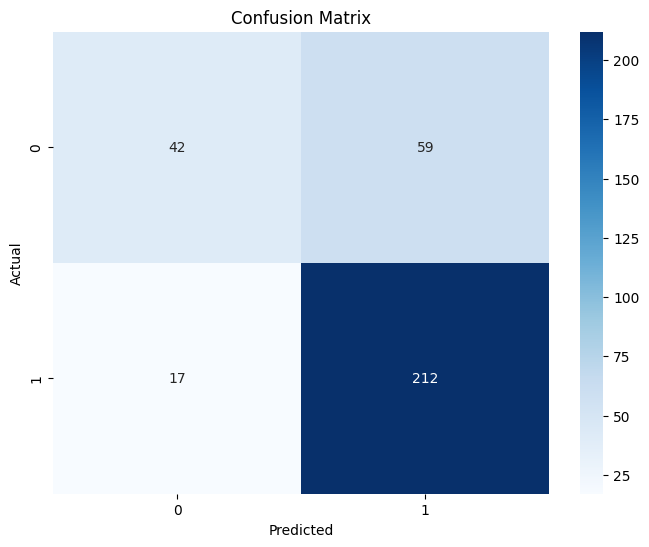

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

По кривой ROC-AUC и по Confusion Matrix видно, что мы хорошо предсказываем, кому кредит выдавать можно, но тем, кому кредит давать нельзя, мы его чаще даём, чем не даём. Это плохо, поэтому надо будет решить данную проблему подбирая параметры

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='roc_auc')

print("Среднее значение ROC AUC после кросс-валидации:", cv_scores.mean())

Среднее значение ROC AUC после кросс-валидации: 0.7576606871105751


Таким образом, среднее значение, полученное при кросс-валидации ниже, чем то, которое было получено нами ранее

# 6.	Сделайте подбор гиперпараметров для лучшей модели из пункта 4.

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier()

# Определяем диапазон параметров для подбора
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Лучшие параметры:", best_params)
print("Лучшее значение ROC AUC:", best_score)

Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 300}
Лучшее значение ROC AUC: 0.7754116059379217


In [94]:
params = {
    'max_depth': 10,
    'min_samples_leaf': 4,
    'min_samples_split': 5,
    'n_estimators': 300
}

rf_model = RandomForestClassifier(**params)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

print("accuracy_rf = ", accuracy_rf)
print("precision_rf = ", precision_rf)
print("recall_rf = ", recall_rf)
print("roc_auc_rf = ", roc_auc_rf)

accuracy_rf =  0.7393939393939394
precision_rf =  0.7474048442906575
recall_rf =  0.9432314410480349
roc_auc_rf =  0.6102295819101561


# 7.	Постройте ансамблевую модель машинного обучения.

In [98]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10)
gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=5)

ensemble_model = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model)], voting='soft')


ensemble_model.fit(X_train, y_train)

y_pred = ensemble_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)

Accuracy: 0.7727272727272727
ROC AUC: 0.6757533831985819


В этом коде мы создаем ансамбль из моделей Random Forest и Gradient Boosting с помощью VotingClassifier, который объединяет их предсказания. Затем мы обучаем ансамбль на обучающем наборе данных и делаем предсказания на тестовом наборе. Наконец, мы оцениваем качество модели с помощью метрик Accuracy и ROC AUC.

В итоге точность стала чуть выше

# Вывод:

В данной работе был проведены все этапы построения модели машинного обучения для решение задачи кредитного скоринга. В ходе работы была проведена обработка датасета, обучены четыре модели и выбрана лучшая модель из этих четырёх. Метрики выбранной модели не очень высокие, есть модели, которые лучше справляются с данной задачей, но их обучение займёт больше времени.

